In [2]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'# if you wish to supress TensorFlow debug info, set to 3
# import code
import glob
import pickle
import numpy as np
import warnings; warnings.simplefilter('ignore', np.RankWarning)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 300; plt.rcParams['axes.labelsize'] = 'xx-large';
from matplotlib.patches import Rectangle
import math

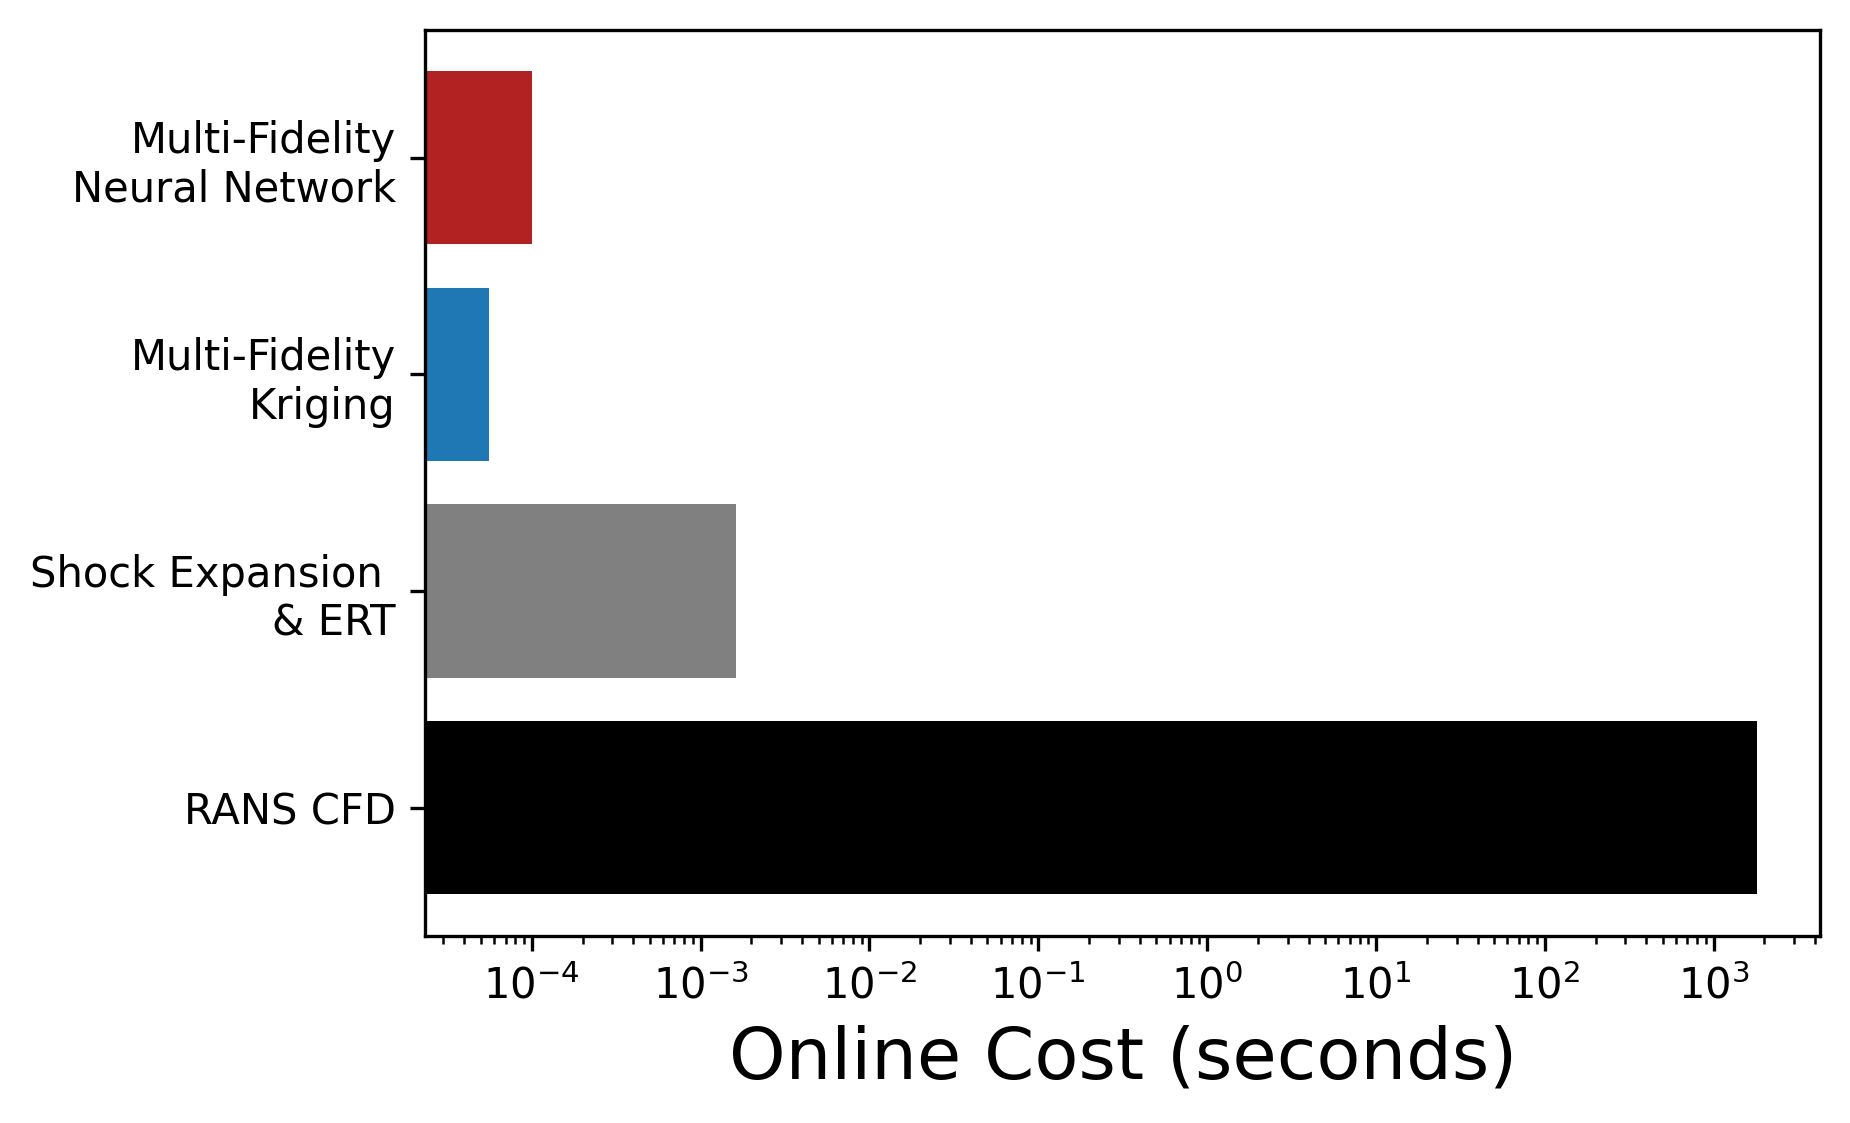

In [24]:
RANScfdTime = 30*60
localMethodsTime = 1.3/800
krigTime = 1/18000
NNTime = 1/10000
labels = ['RANS CFD', 'Shock Expansion \n& ERT', 'Multi-Fidelity\nKriging','Multi-Fidelity\nNeural Network']
sizeList = [RANScfdTime,localMethodsTime,krigTime,NNTime]
width = 0.35

fig,ax = plt.subplots()
p1 = ax.barh(labels,sizeList, color=[ 'black','grey','tab:blue','firebrick'])
ax.set_xlabel('Online Cost (seconds)')
ax.set_xscale('log')

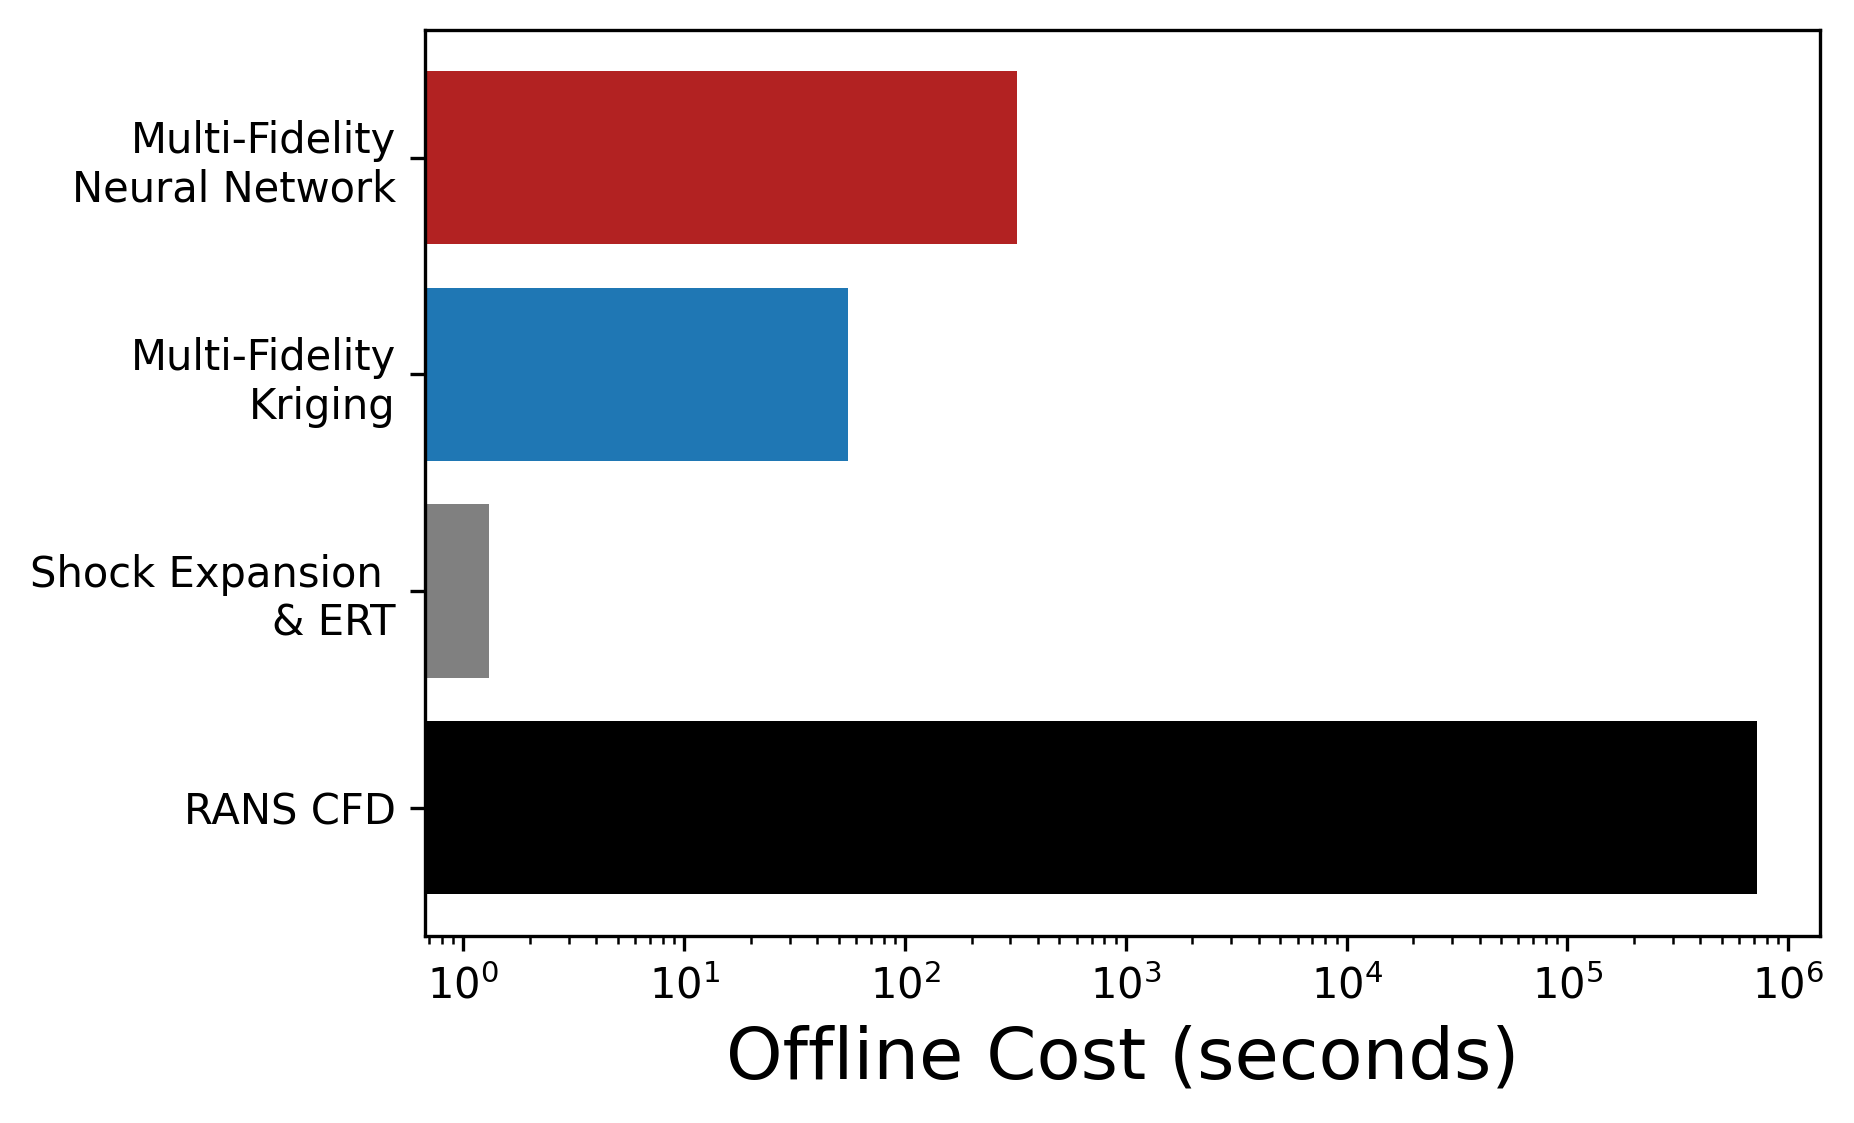

In [27]:
RANScfdTime = 30*60*400
localMethodsTime = 1.3
krigTime = 55
NNTime = 321
labels = ['RANS CFD', 'Shock Expansion \n& ERT', 'Multi-Fidelity\nKriging','Multi-Fidelity\nNeural Network']
topList = [RANScfdTime,localMethodsTime,krigTime,NNTime]

width = 0.35

fig,ax = plt.subplots()

# ax.barh(labels,bottomList, color=[ 'black','black','black','black'])
ax.barh(labels,topList, color=['black','grey','tab:blue','firebrick'])
ax.set_xlabel('Offline Cost (seconds)')
ax.set_xscale('log')

Text(0.5, 0, 'Size on Disk (MB)')

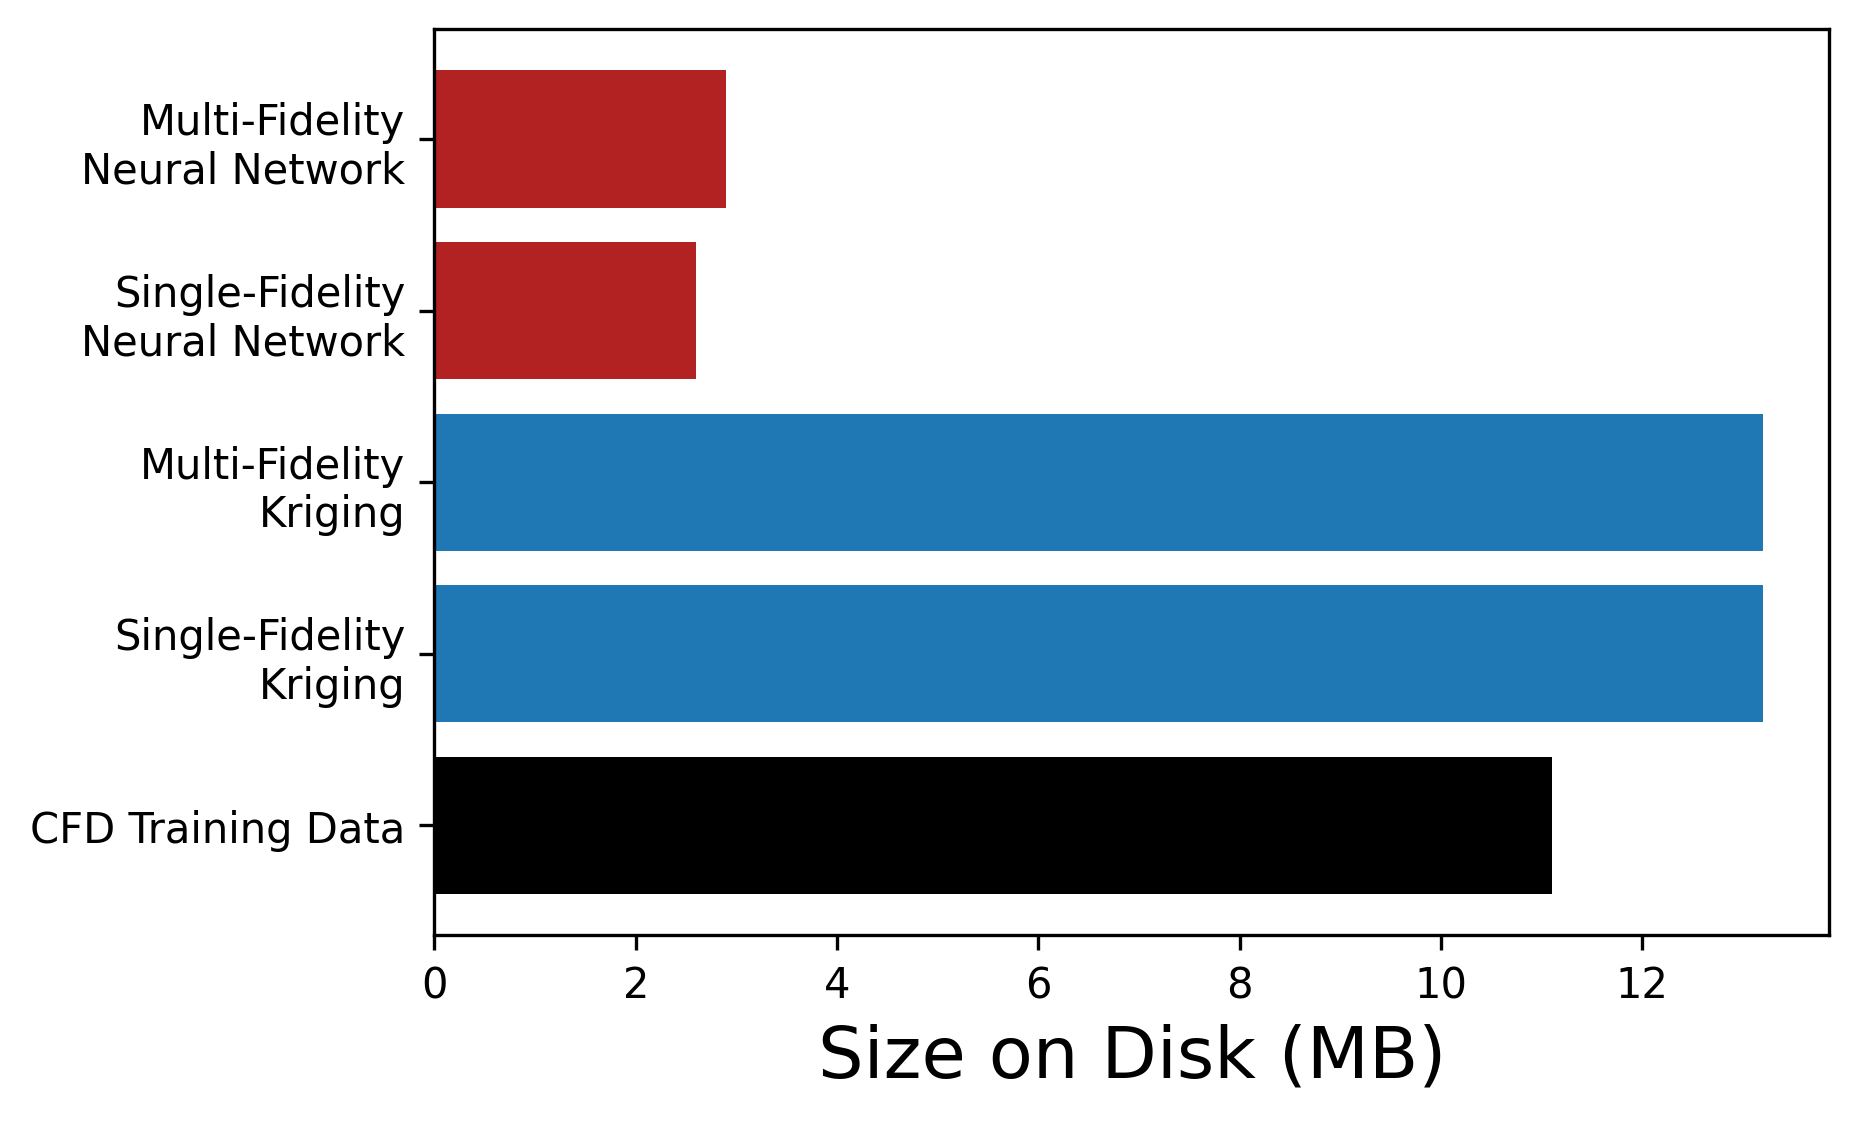

In [25]:
trainingDataSize = 11.1
HFNNsize = 2.6
MFNNsize = 2.9
krigingsize = 13.2
labels = ['CFD Training Data', 'Single-Fidelity\nKriging', 'Multi-Fidelity\nKriging', 'Single-Fidelity\nNeural Network', 'Multi-Fidelity\nNeural Network']
sizeList = [trainingDataSize,krigingsize,krigingsize,HFNNsize, MFNNsize]
ind = np.arange(len(sizeList))
width = 0.35

fig,ax = plt.subplots()
p1 = ax.barh(labels,sizeList, color=[ 'black','tab:blue','tab:blue','firebrick','firebrick' ])
ax.set_xlabel('Size on Disk (MB)')

# ax.figure
# ax.set_title()
# ax.set_xticks(ind, labels=labels)
# plt.xticks(rotation=30, ha='right')

In [ ]:
trainingDataSize = 11.1
HFNNsize = 2.6
MFNNsize = 2.9
krigingsize = 13.2
labels = ['CFD Training Data', 'Single-Fidelity\nKriging', 'Multi-Fidelity\nKriging', 'Single-Fidelity\nNeural Network', 'Multi-Fidelity\nNeural Network']
sizeList = [trainingDataSize,krigingsize,krigingsize,HFNNsize, MFNNsize]
ind = np.arange(len(sizeList))
width = 0.35

fig,ax = plt.subplots()
p1 = ax.barh(labels,sizeList, color=[ 'black','tab:blue','tab:blue','firebrick','firebrick' ])
ax.set_xlabel('Size on Disk (MB)')

TypeError: barh() got multiple values for argument 'width'

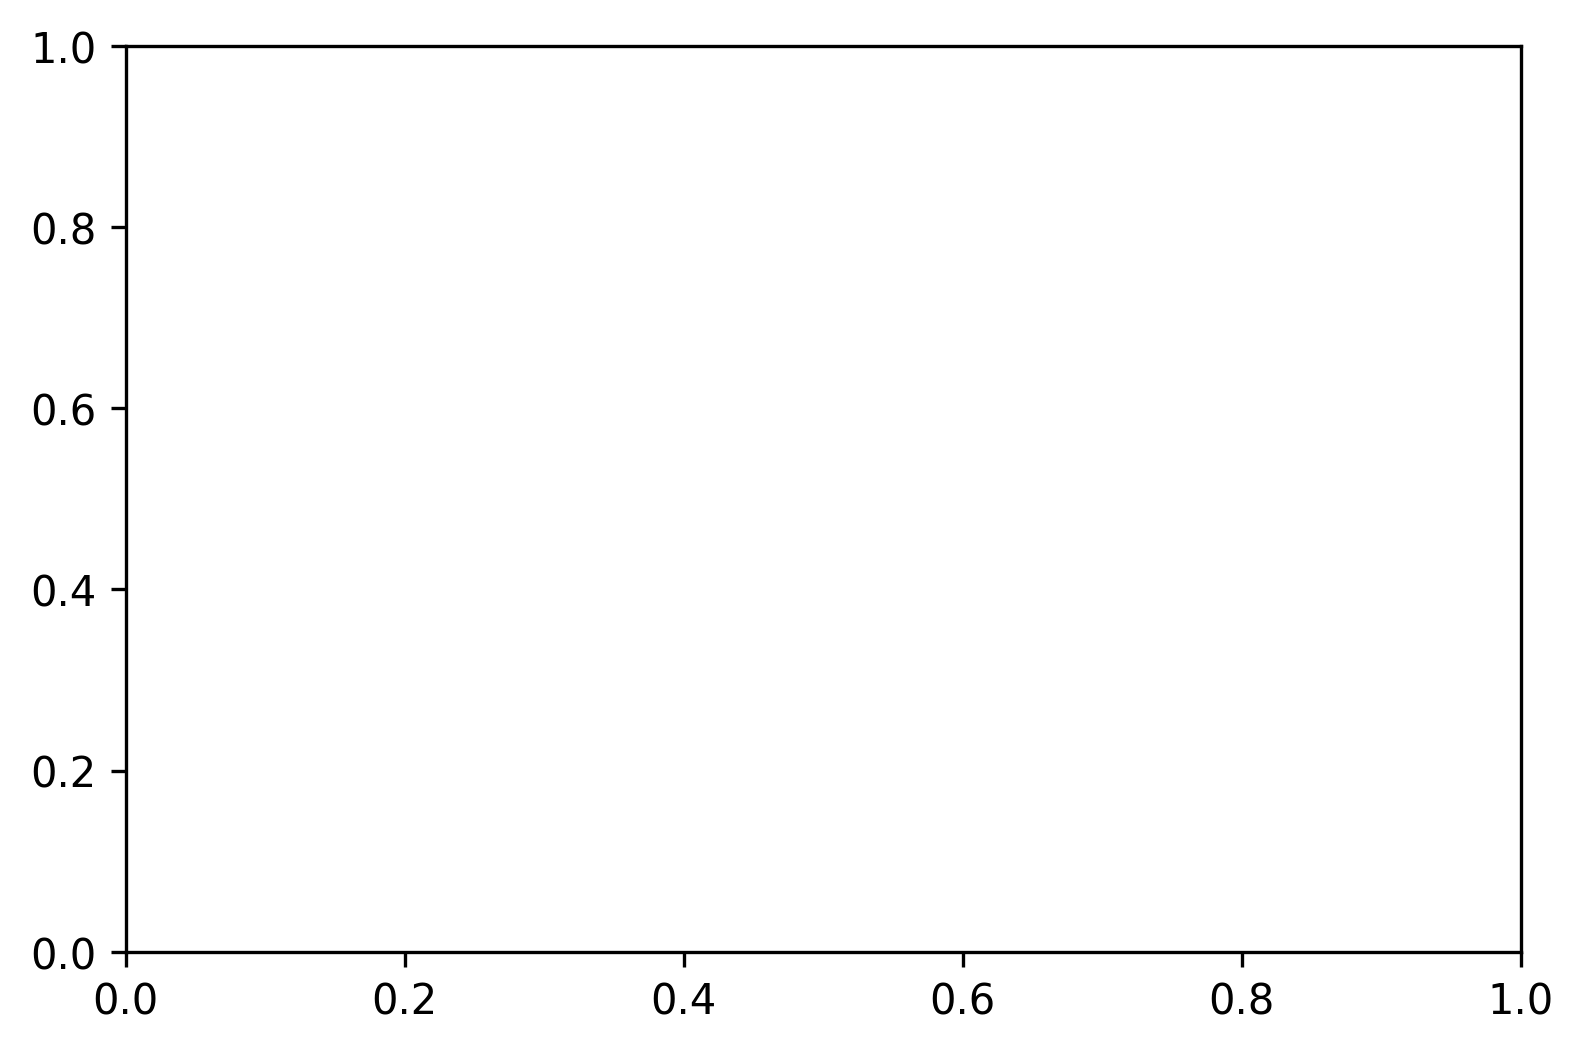

In [83]:
trainingDataSize = 11.1
HFNNsize = 2.6
MFNNsize = 2.9
krigingsize = 13.2
labels = ['CFD Training Data', 'Single-Fidelity Kriging', 'Multi-Fidelity Kriging', 'Single-Fidelity Neural Network', 'Multi-Fidelity Neural Network']
sizeList = [trainingDataSize,krigingsize,krigingsize,HFNNsize, MFNNsize]
ind = np.arange(len(sizeList))
width = 0.35

fig,ax = plt.subplots()
p1 = ax.bar(labels,sizeList, width = width)
ax.set_ylabel('Size on Disk (MB)')
# ax.set_title()
# ax.set_xticks(ind, labels=labels)
plt.xticks(rotation=30, ha='right')

In [ ]:

areaList = [trainingDataArea, MFNNarea,HFNNarea, krigingArea]
widthList = [math.sqrt(area) for area in areaList]
maxWidth = np.max(widthList)
colors = plt.cm.jet(np.linspace(0,1,len(areaList)))
colors = ['firebrick', 'black', 'white', 'dimgrey']

#build1
# areaList = [trainingDataArea]
#build2
# areaList = [trainingDataArea, MFNNarea,HFNNarea]
#build3
areaList = [trainingDataArea, MFNNarea,HFNNarea, krigingArea]
widthList = [math.sqrt(area) for area in areaList]


ax = plt.subplot()

for i, width in enumerate(widthList): 
    
    if (len(areaList) == 4) & (i == len(areaList)-1):
        zorder=0
    else:
        zorder = i+1
    rect = Rectangle((0,0), width,width,alpha=0.7, color=colors[i],zorder=zorder)
    ax.add_patch(rect)

    #leftvertical
    plt.vlines(x=0, ymin=0,ymax=width, colors=colors[i],zorder = zorder)
    #rightvertical
    plt.vlines(x=width, ymin=0,ymax=width, colors=colors[i],zorder = zorder)
    #tophorizontal
    plt.hlines(y=width, xmin=0,xmax=width, colors=colors[i],zorder = zorder)
    #bottomhorizontal
    plt.hlines(y=0, xmin=0,xmax=width, colors=colors[i],zorder = zorder)

ax.set(xlim=(0, 1.1*maxWidth), ylim=(0, 1.1*maxWidth))
plt.axis('off')


In [ ]:


x = np.linspace(0,trainingDataWidth, 10)

for xVal in x:
    plt.vlines(x, 0, np.max(x))
    plt.hlines(x, 0, np.max(x))

NNwidth = math.sqrt(MFNNarea)

x = np.linspace(0,NNwidth, 10)

for xVal in x:
    plt.vlines(x, 0, np.max(x), colors=['k'])
    plt.hlines(x, 0, np.max(x), colors=['k'])

krigWidth = math.sqrt(krigingArea)

x = np.linspace(0,krigWidth, 10)

for xVal in x:
    plt.vlines(x, 0, np.max(x), colors=['orange'])
    plt.hlines(x, 0, np.max(x), colors=['orange'])